In [1]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

2025-04-19 00:08:30.450422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745021310.646873      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745021310.707881      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# date_time function
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [3]:
# Performance Plot
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]

    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]

    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [4]:
# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(20, 15))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [5]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('../input/gtsrb-german-traffic-sign/','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [6]:
# Checking data shape
print("Original data shape:", data.shape, labels.shape)

Original data shape: (39209, 30, 30, 3) (39209,)


In [7]:

# split into train and temp (temp will be further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)

# Then split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Displaying the shape after the split
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

Train set shape: (27446, 30, 30, 3) (27446,)
Validation set shape: (5881, 30, 30, 3) (5881,)
Test set shape: (5882, 30, 30, 3) (5882,)


In [8]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model display
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745021613.285720      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745021613.286440      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,624,939 (6.20 MB)

 Trainable params: 1,624,939 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Training the Model with validation data
with tf.device('/GPU:0'):
    epochs = 35
    # Using validation set instead of test set during training
    history = model.fit(
        X_train, y_train, 
        batch_size=128, 
        epochs=epochs, 
        validation_data=(X_val, y_val)  # Using validation data instead of test data
    )

Epoch 1/35


I0000 00:00:1745021617.643005      93 service.cc:148] XLA service 0x7aabb800cdc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745021617.643562      93 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745021617.643582      93 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745021617.972298      93 cuda_dnn.cc:529] Loaded cuDNN version 90300


 12/215 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0385 - loss: 13.1293

I0000 00:00:1745021622.643609      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


215/215 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.3879 - loss: 3.5224 - val_accuracy: 0.9691 - val_loss: 0.1414
Epoch 2/35
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9445 - loss: 0.2344 - val_accuracy: 0.9842 - val_loss: 0.0712
Epoch 3/35
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9626 - loss: 0.1355 - val_accuracy: 0.9900 - val_loss: 0.0475
Epoch 4/35
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9750 - loss: 0.0939 - val_accuracy: 0.9884 - val_loss: 0.0463
Epoch 5/35
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9794 - loss: 0.0783 - val_accuracy: 0.9923 - val_loss: 0.0312
Epoch 6/35
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9836 - loss: 0.0638 - val_accuracy: 0.9923 - val_loss: 0.0332
Epoch 7/35
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9868 - loss: 0.0532 - val_accuracy: 0.9934 - val_loss: 0.0296
Epoch 8/35
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9878 - loss: 0.0415 - val_accuracy: 0.99

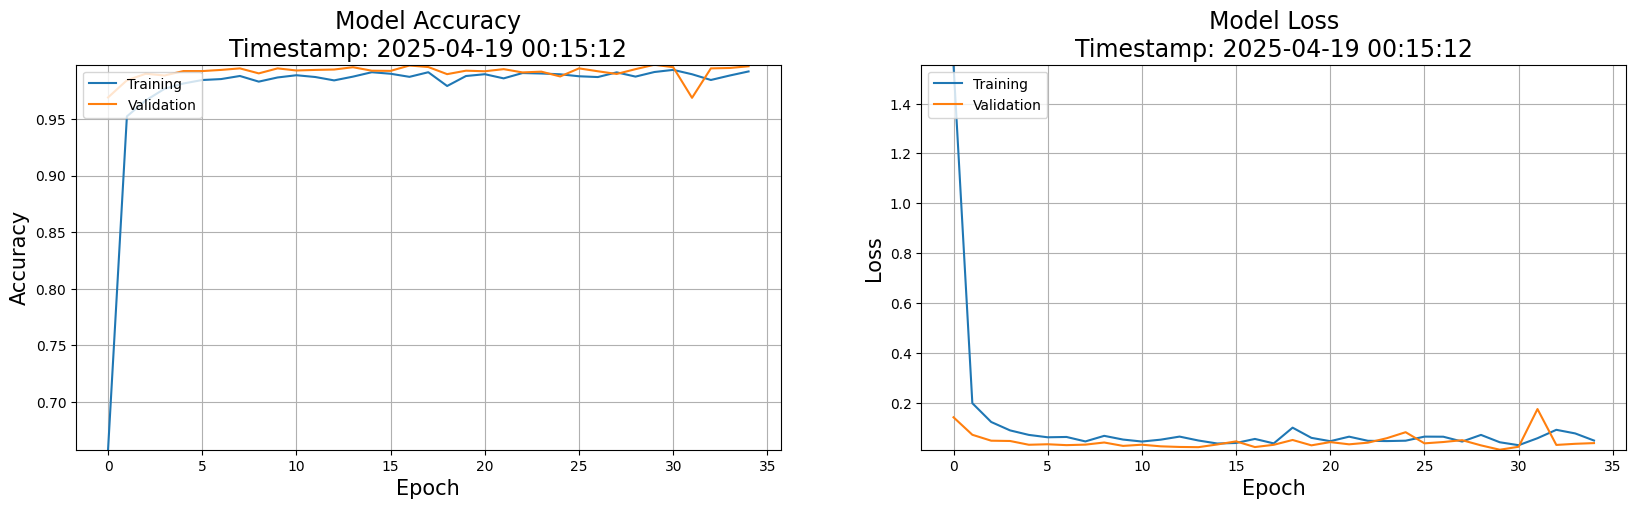

In [10]:
# Plotting training performance
plot_performance(history=history)

In [12]:
# CHANGE 3: Evaluate on our test set (the third partition)
with tf.device('/GPU:0'):
    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Get predictions for test set
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Generate classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0675
Test Loss: 0.0592
Test Accuracy: 0.9949
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       1.00      0.99      0.99       364
           2       1.00      0.99      1.00       339
           3       0.99      1.00      1.00       213
           4       1.00      1.00      1.00       330
           5       0.99      1.00      0.99       270
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00       201
           8       1.00      1.00      1.00       227
           9       1.00      0.99      0.99       227
          10       1.00      1.00      1.00       285
          11       0.99      0.99      0.99       171
          12       1.00      1.00      1.00       320
          13       1.00      1.00      1.00       320
          

In [13]:
# Also evaluate on external test data from CSV (as in the original code)
print("\nEvaluating on external test data from CSV:")
# Importing the external test dataset
y_test_external = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

external_labels = y_test_external["ClassId"].values
external_imgs = y_test_external["Path"].values

external_data = []



Evaluating on external test data from CSV:


In [14]:
# Retrieving the images
with tf.device('/GPU:0'):
    for img in external_imgs:
        image = Image.open('../input/gtsrb-german-traffic-sign/'+img)
        image = image.resize([30, 30])
        external_data.append(np.array(image))

X_test_external = np.array(external_data)

with tf.device('/GPU:0'):
    external_pred = np.argmax(model.predict(X_test_external), axis=-1)

# Accuracy with the external test data
external_accuracy = accuracy_score(external_labels, external_pred)
print(f"External Test Data Accuracy: {external_accuracy:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
External Test Data Accuracy: 0.9747


In [16]:
# CHANGE 5: Properly save model in all formats
# Create a directory for saved models
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# 1. Save to .h5 (Keras format)
model.save('saved_models/traffic_classifier.h5')
print(f"Keras H5 model saved at: saved_models/traffic_classifier.h5")

# 2. Save as SavedModel
# Note: Use export() instead of save() for SavedModel format in newer TF versions
saved_model_path = "saved_models/traffic_classifier_savedmodel"
model.export(saved_model_path)  # Using export() instead of save()
print(f"SavedModel saved at: {saved_model_path}")

# 3. Convert to TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()
tflite_path = "saved_models/traffic_classifier.tflite"
with open(tflite_path, "wb") as f:
    f.write(tflite_model)
print(f"TF-Lite model saved at: {tflite_path}")

Keras H5 model saved at: saved_models/traffic_classifier.h5
Saved artifact at 'saved_models/traffic_classifier_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 30, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 43), dtype=tf.float32, name=None)
Captures:
  134881985679952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134881714585040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134881714583888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134881714580624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134881715065808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134881715066384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134881715066192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134881715066960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134881715067344: TensorSpec(shape=(), dtype=tf.resource, name=None)
 

W0000 00:00:1745022102.676354      31 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1745022102.676389      31 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1745022102.685083      31 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


In [17]:
# 4. Convert to TensorFlow.js (ensure tensorflowjs is installed)
try:
    # Install TensorFlow.js tools if not installed
    !pip install -q tensorflowjs
    
    # Convert to TensorFlow.js format
    tfjs_path = "saved_models/tfjs_model"
    !tensorflowjs_converter --input_format=tf_saved_model {saved_model_path} {tfjs_path}
    print(f"TensorFlow.js model saved at: {tfjs_path}")
    
    # Zip the TensorFlow.js model for easier download
    !zip -r saved_models/tfjs_model.zip {tfjs_path}
except Exception as e:
    print(f"Error saving TensorFlow.js model: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.5.0 requires fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
pandas-gbq 0.26.1 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
2025-04-19 00:22:11.226224: E external/local_xl

In [18]:
# Save requirements.txt
!pip freeze > saved_models/requirements.txt
print("Requirements file saved at: saved_models/requirements.txt")

print("All models successfully saved!")

Requirements file saved at: saved_models/requirements.txt
All models successfully saved!
